In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("Customer-Churn.csv")

In [ ]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with RandomForestClassifier

# Fit the encoder on the categorical features and transform them
encoded_features = encoder.fit_transform(X[categorical_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))


In [ ]:
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_y_pred = rf_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

[[950  86]
 [201 172]]
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.67      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



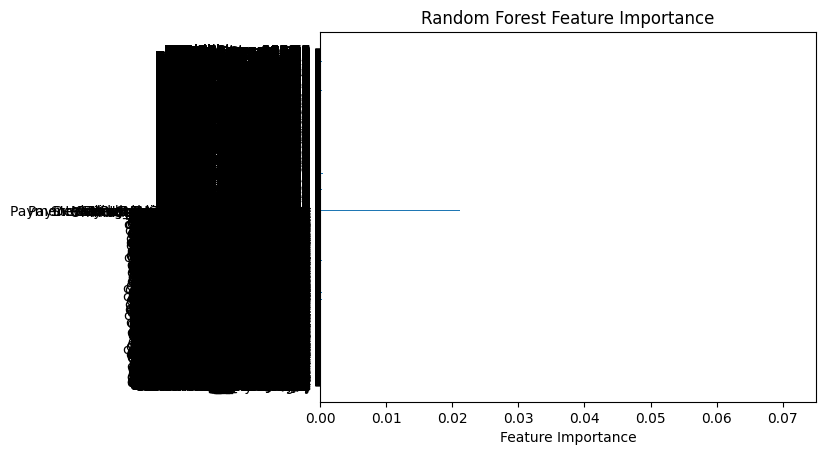

In [ ]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()